# Health Analytics
- The application of data mining (machine learning & statistical testing) to different type of healthcare problems and datasets

## Can healthcare providers use data analytics to predict diseases (e.g., 2nd heart attack) and hospital readmission?

### Dataset
Source: Data Mining for the Masses by Matthew North
    
Sonia has access to the company’s medical claims database. 
With this access, she is able to generate two data sets for us. 
This first is a list of people who have suffered heart attacks, 
with an attribute indicating whether or not they have had more than one; 
and the second is a list of those who have had a first heart attack, but not a second. 
The former data set, comprised of 138 observations, will serve as our training data; while the latter, 
comprised of 690 peoples’ data, will be for scoring. 
Sonia’s hope is to help this latter group of people avoid becoming second heart attack victims. 

In compiling the two data sets we have defined the following attributes: 

* **Age**: The age in years of the person, rounded to the nearest whole year. 
* **Marital_Status**: The person’s current marital status, indicated by a coded number: **0–Single, never married; 1–Married; 2–Divorced; 3–Widowed** 
* **Gender**: The person’s gender: **0 for female; 1 for male**. 
* **Weight_Category**: The person’s weight categorized into one of three levels: **0 for normal weight range; 1 for overweight; and 2 for obese** 
* **Cholesterol**: The person’s cholesterol level, as recorded at the time of their treatment for their most recent heart attack (their only heart attack, in the case of those individuals in the scoring data set. 
* **Stress_Management**: A binary attribute indicating whether or not the person has previously attended a stress management course: **0 for no; 1 for yes**. 
* **Trait_Anxiety**: A score on a scale of **0 to 100** measuring the level of each person’s natural stress levels and abilities to cope with stress. A short time after each person in each of the two data sets had recovered from their first heart attack, they were administered a standard test of natural anxiety. Their scores are tabulated and recorded in this attribute along five point increments. A score of 0 would indicate that the person never feels anxiety, pressure or stress in any situation, while a score of 100 would indicate that the person lives in a constant state of being overwhelmed and unable to deal with his or her circumstances. 
* **2nd_Heart_Attack**: This attribute exists only in the training data set. It will be our label, the prediction or target attribute. In the training data set, the attribute is set to **‘yes’** for individuals who have suffered second heart attacks, and **‘no’** for those who have not.                  

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Loading data

In [22]:
df=pd.read_csv("data/heartattack_train.csv")
print df.head()

   Age  Marital_Status  Gender  Weight_Category  Cholesterol  \
0   60               2       0                1          150   
1   69               2       1                1          170   
2   52               1       0                0          174   
3   66               2       1                1          169   
4   70               3       0                1          237   

   Stress_Management  Trait_Anxiety 2nd_Heart_Attack  
0                  1             50              Yes  
1                  0             60              Yes  
2                  1             35               No  
3                  0             60              Yes  
4                  0             65              Yes  


In [23]:
df.info()
#no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 8 columns):
Age                  138 non-null int64
Marital_Status       138 non-null int64
Gender               138 non-null int64
Weight_Category      138 non-null int64
Cholesterol          138 non-null int64
Stress_Management    138 non-null int64
Trait_Anxiety        138 non-null int64
2nd_Heart_Attack     138 non-null object
dtypes: int64(7), object(1)
memory usage: 8.7+ KB


# Data wrangling & ETL: Data cleaningg & transformation

In [24]:
#mappling or replacing
df = df.replace({'2nd_Heart_Attack': 'No'}, {'2nd_Heart_Attack': '0'})
df = df.replace({'2nd_Heart_Attack': 'Yes'}, {'2nd_Heart_Attack': '1'})

In [25]:
df.info()
#2nd heart attack is still treated as object or string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 8 columns):
Age                  138 non-null int64
Marital_Status       138 non-null int64
Gender               138 non-null int64
Weight_Category      138 non-null int64
Cholesterol          138 non-null int64
Stress_Management    138 non-null int64
Trait_Anxiety        138 non-null int64
2nd_Heart_Attack     138 non-null object
dtypes: int64(7), object(1)
memory usage: 8.7+ KB


In [26]:
#or you can do this to convert object to number
df['2nd_Heart_Attack'] = df['2nd_Heart_Attack'].astype(int)
print df.dtypes

Age                  int64
Marital_Status       int64
Gender               int64
Weight_Category      int64
Cholesterol          int64
Stress_Management    int64
Trait_Anxiety        int64
2nd_Heart_Attack     int32
dtype: object


In [27]:
df = df.convert_objects(convert_numeric=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 8 columns):
Age                  138 non-null int64
Marital_Status       138 non-null int64
Gender               138 non-null int64
Weight_Category      138 non-null int64
Cholesterol          138 non-null int64
Stress_Management    138 non-null int64
Trait_Anxiety        138 non-null int64
2nd_Heart_Attack     138 non-null int32
dtypes: int32(1), int64(7)
memory usage: 8.2 KB


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


# Exploratory data analysis

In [28]:
# basic statistics
df.describe()

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,2nd_Heart_Attack
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,62.978261,1.695652,0.623188,0.920290,177.391304,0.442029,55.434783,0.492754
std,7.853092,0.824875,0.486352,0.764749,32.262707,0.498437,12.373126,0.501769
min,42.000000,0.000000,0.000000,0.000000,122.000000,0.000000,35.000000,0.000000
25%,58.000000,1.000000,0.000000,0.000000,161.000000,0.000000,45.000000,0.000000
50%,63.000000,2.000000,1.000000,1.000000,172.000000,0.000000,55.000000,0.000000
75%,69.000000,2.000000,1.000000,1.750000,188.750000,1.000000,60.000000,1.000000
max,81.000000,3.000000,1.000000,2.000000,239.000000,1.000000,80.000000,1.000000


In [29]:
# correlation analysis
df.corr()

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,2nd_Heart_Attack
Age,1.000000,0.427159,0.076195,0.402007,0.395331,-0.359295,0.667169,0.499182
Marital_Status,0.427159,1.000000,-0.033225,0.065402,0.273574,-0.291773,0.238340,0.364978
Gender,0.076195,-0.033225,1.000000,0.448531,0.191354,-0.241320,0.082007,0.317746
Weight_Category,0.402007,0.065402,0.448531,1.000000,0.397702,-0.347322,0.501244,0.730832
Cholesterol,0.395331,0.273574,0.191354,0.397702,1.000000,-0.405735,0.579485,0.506531
Stress_Management,-0.359295,-0.291773,-0.241320,-0.347322,-0.405735,1.000000,-0.321362,-0.439473
Trait_Anxiety,0.667169,0.238340,0.082007,0.501244,0.579485,-0.321362,1.000000,0.482548
2nd_Heart_Attack,0.499182,0.364978,0.317746,0.730832,0.506531,-0.439473,0.482548,1.000000


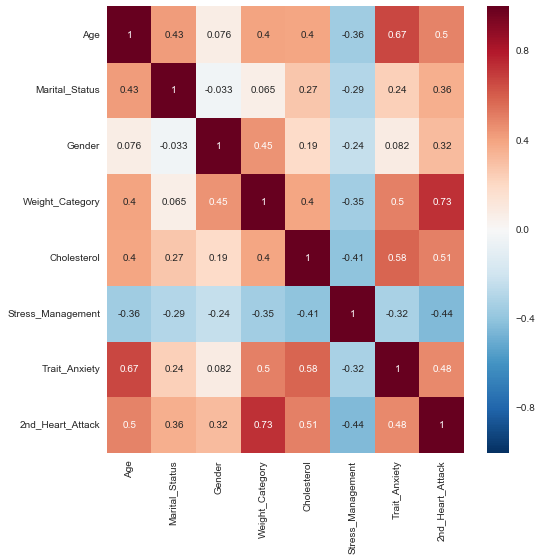

In [30]:
# heatmap for correlation
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)

# Data visualization & business intelligence
I skip this step to focus on model building. In a real-world project, you should extract business intelligence using data visualization (e.g., groupby, matplotlib, seaborn)


# Model Building & Validation

When building a predictive model, we split the original data into two datasets: **training dataset and testing (validation) dataset**. This is called **"split validation"**, a type of **"model validation"**
- A predictive model is built using the **training dataset** and **the model quality** is assessed as the model is applied into the **testing (validation) dataset** (See Appendix for more details)

> **Two types of model validation**: 
 1. **split validation** (70% of the original data as training and the other 30% as testing dataset)
 2. **cross validation** (90% of the original data as training and the other 10% as testing dataset): This allows to test the model quality 10 times. The average value is used to measure the model performance

In [31]:
# declare X variables and y variable
y = df['2nd_Heart_Attack']
X = df.drop(['2nd_Heart_Attack'], axis=1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [33]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt.predict(X_test))

# y-test is the acual y value in the testing dataset
# dt.predict(X_test) is the y value generated by your model
# If they are same, we can say your model is accurate.

0.928571428571
--------------------------------------------------------
[[18  1]
 [ 2 21]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.90      0.95      0.92        19
          1       0.95      0.91      0.93        23

avg / total       0.93      0.93      0.93        42

--------------------------------------------------------
0.930205949657


# Model Deployement: Make Predictions on the new dataset (training dataset)

## Important!!!: I used 7 variables to train a decision tree model above. Then, make sure you have the same number of variables in the testing data. Also the variables names must be identical.)

In [34]:
# scoring dataset
testingdata=pd.read_csv("data/heartattack_scoring.csv")
testingdata.head(2)
#no Y value in this dataset ... 
#we are trying to predict whether the people in this scoring dataset are likely to have 2nd heart attack or not.

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety
0,61,0,1,1,139,1,50
1,55,2,1,2,163,0,40


In [35]:
testingdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 7 columns):
Age                  690 non-null int64
Marital_Status       690 non-null int64
Gender               690 non-null int64
Weight_Category      690 non-null int64
Cholesterol          690 non-null int64
Stress_Management    690 non-null int64
Trait_Anxiety        690 non-null int64
dtypes: int64(7)
memory usage: 37.8 KB


In [36]:
predictedY = dt.predict(testingdata)
print predictedY

[0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1
 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0
 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0
 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1
 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0
 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1
 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0
 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0
 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0
 1 1 1 0 1 1 0 1 0 1 1 0 

In [37]:
#combine the predicted Y value with the scoring dataset
predictedY = pd.DataFrame(predictedY, columns=['predicted Y'])
predictedY.head()

,predicted Y
0,0
1,1
2,0
3,1
4,1


In [38]:
#finally ...
data1 = testingdata.join(predictedY) 
data1.head()

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,predicted Y
0,61,0,1,1,139,1,50,0
1,55,2,1,2,163,0,40,1
2,53,1,1,1,172,0,55,0
3,58,1,1,2,206,0,70,1
4,62,2,1,1,148,1,50,1


2nd person (a 55 years old male) is likely to have 2nd heart attack

In [39]:
data1.to_csv("data/output_risky_patients.csv")